# Map of correlations

In [2]:
import xarray as xr
from pathlib import Path

import intake
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import os

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
# to get the land mask from ICON
# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)


In [39]:
# UM model

# define paths
datapath = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/'
model = 'UM'
zoom = 'z5'
fpath = f'{datapath}/data.healpix.PT1H.{zoom}.zarr'

# open the zarr file
dum = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in dum.data_vars.items():
    print(f'{key}: {longname.long_name}')
    
dum=dum.sel(time=slice('2020-03','2021-03'))

clivi: atmosphere_mass_content_of_cloud_ice
clt: cloud_area_fraction
clwvi: atmosphere_mass_content_of_cloud_condensed_water
hflsd: surface_downward_latent_heat_flux
hfssd: surface_downward_sensible_heat_flux
huss: specific_humidity
pr: precipitation_flux
prs: solid_precipitation_flux
prw: atmosphere_mass_content_of_water_vapor
ps: surface_air_pressure
psl: air_pressure_at_mean_sea_level
rlds: surface_downwelling_longwave_flux_in_air
rldscs: surface_downwelling_longwave_flux_in_air_clear_sky
rlut: toa_outgoing_longwave_flux
rlutcs: toa_outgoing_longwave_flux_clear_sky
rsds: surface_downwelling_shortwave_flux_in_air
rsdscs: surface_downwelling_shortwave_flux_in_air_clear_sky
rsdt: toa_incoming_shortwave_flux
rsut: toa_outgoing_shortwave_flux
rsutcs: toa_outgoing_shortwave_flux_clear_sky
tas: air_temperature
ts: surface_temperature
uas: eastward_wind
vas: northward_wind


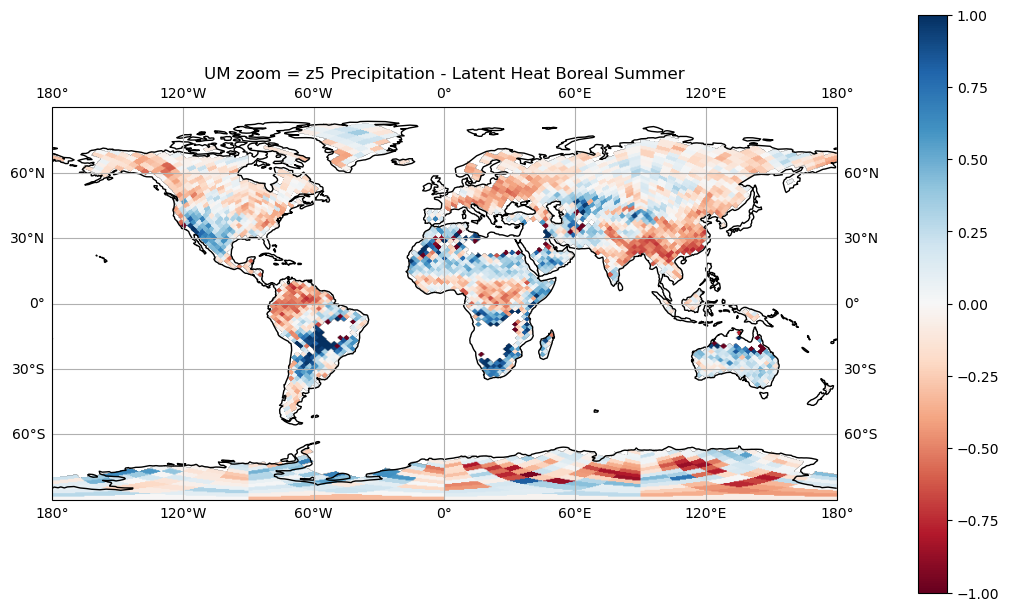

In [59]:
#boreal summer
dum_jja = dum.sel(time=dum['time'].dt.month.isin([6,7,8]))
um_pr = dum_jja['pr'].resample(time='1D').mean(dim='time') * 86400
um_prs = dum_jja['prs'].resample(time='1D').mean(dim='time') * 86400
um_pr = um_pr+um_prs
um_lh = (dum_jja['hflsd']*-1).resample(time='1D').mean(dim='time')

um_y1  = xr.where((um_pr>=.1)&(ds['sftlf']>0.9), um_lh, np.nan)

um_corr_lh_pr      =  xr.corr(um_pr, um_y1, dim='time')

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(um_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - Latent Heat Boreal Summer')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()



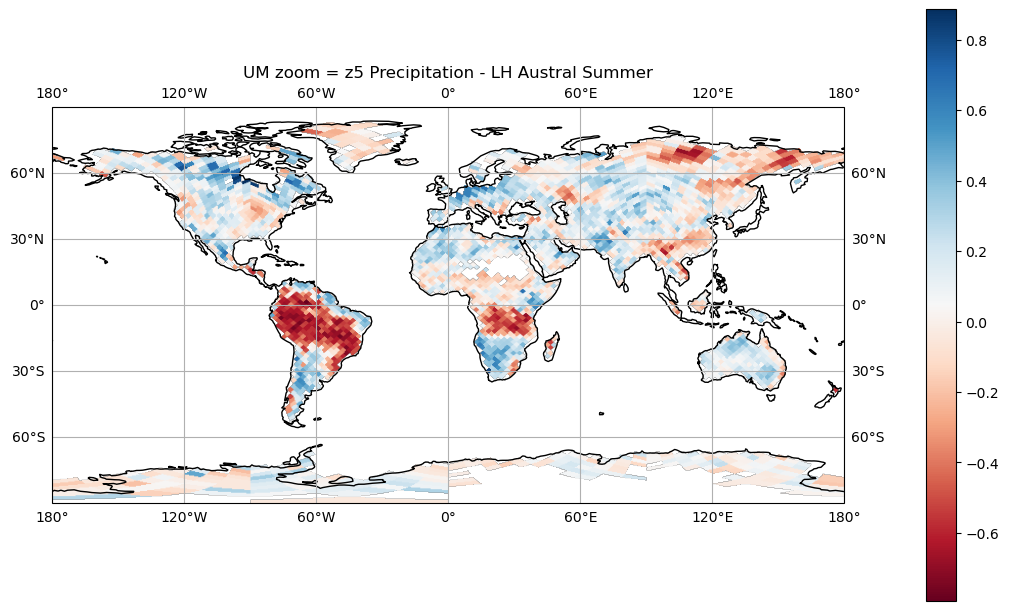

In [44]:
#for austral summer - daily 
dum=dum.sel(time=slice('2020-03','2021-03'))
dum_djf = dum.sel(time=dum['time'].dt.month.isin([12, 1, 2]))
um_pr = dum_djf['pr'].resample(time='1D').mean(dim='time') * 86400
um_lh = (dum_djf['hflsd']*-1).resample(time='1D').mean(dim='time')
# latent heat


um_y1  = xr.where((ds['sftlf']>0.9), um_lh, np.nan)
um_corr_lh_pr      =  xr.corr(um_pr, um_y1, dim='time') 
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(um_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH Austral Summer')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

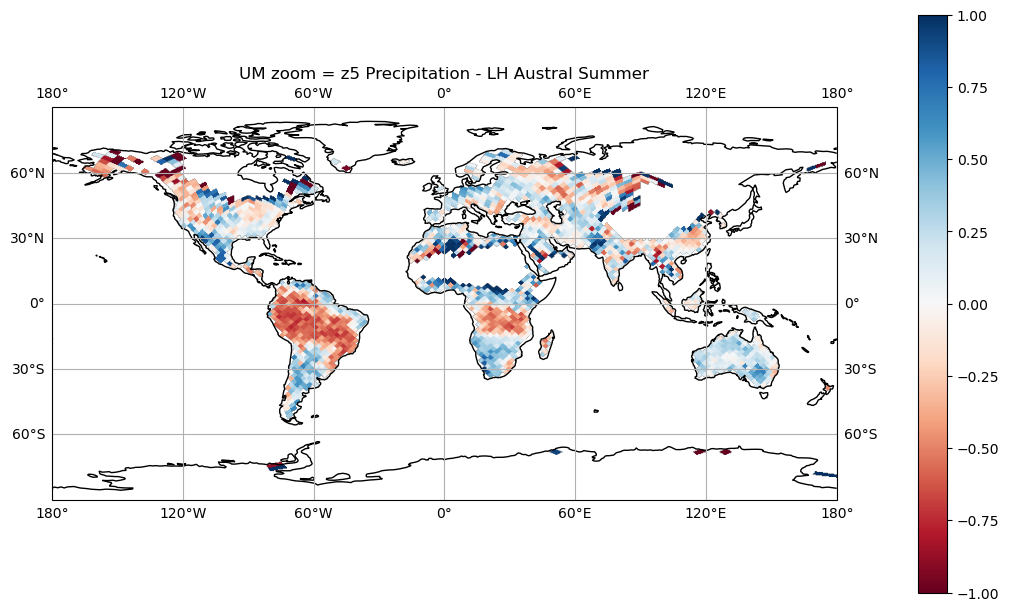

In [52]:
#for austral summer - daily 
dum=dum.sel(time=slice('2020-03','2021-03'))
dum_djf = dum.sel(time=dum['time'].dt.month.isin([12, 1, 2]))
um_pr = dum_djf['pr'].resample(time='1D').mean(dim='time') * 86400
um_lh = (dum_djf['hflsd']*-1).resample(time='1D').mean(dim='time')
# latent heat


um_y1  = xr.where((um_pr>=.1)&(ds['sftlf']>0.9), um_lh, np.nan)
um_corr_lh_pr      =  xr.corr(um_pr, um_y1, dim='time') 
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(um_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH Austral Summer')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

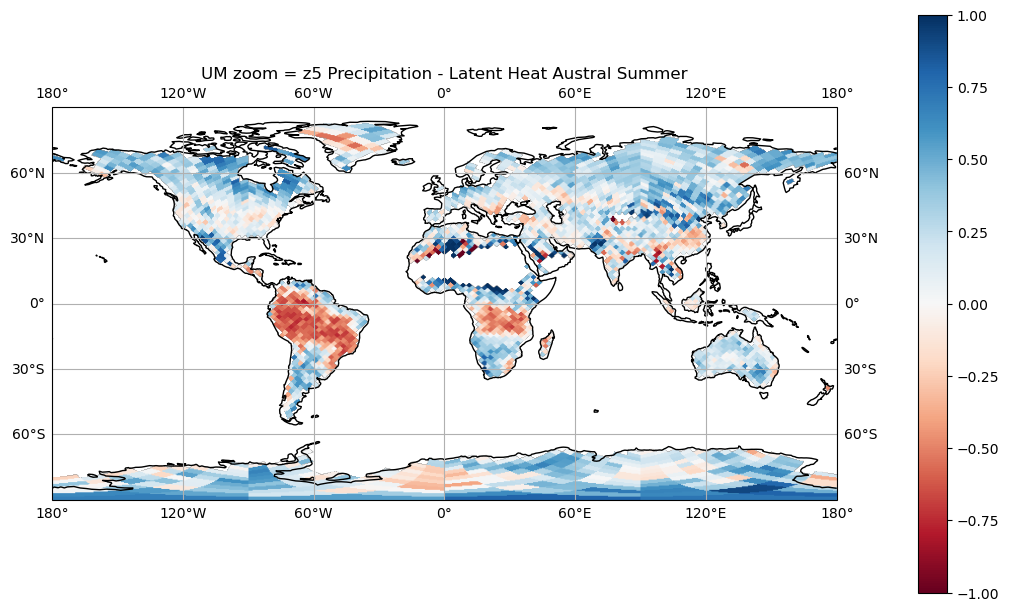

In [58]:
#incl solid precipitation

#for austral summer - daily 
dum=dum.sel(time=slice('2020-03','2021-02'))
dum_djf = dum.sel(time=dum['time'].dt.month.isin([12, 1, 2]))
um_pr = dum_djf['pr'].resample(time='1D').mean(dim='time') * 86400
um_prs = dum_djf['prs'].resample(time='1D').mean(dim='time') * 86400
um_pr = um_pr+um_prs

um_lh = (dum_djf['hflsd']*-1).resample(time='1D').mean(dim='time')
um_y1  = xr.where((um_pr>=.1)&(ds['sftlf']>0.9), um_lh, np.nan)
um_corr_lh_pr      =  xr.corr(um_pr, um_y1, dim='time') 
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(um_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - Latent Heat Austral Summer')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

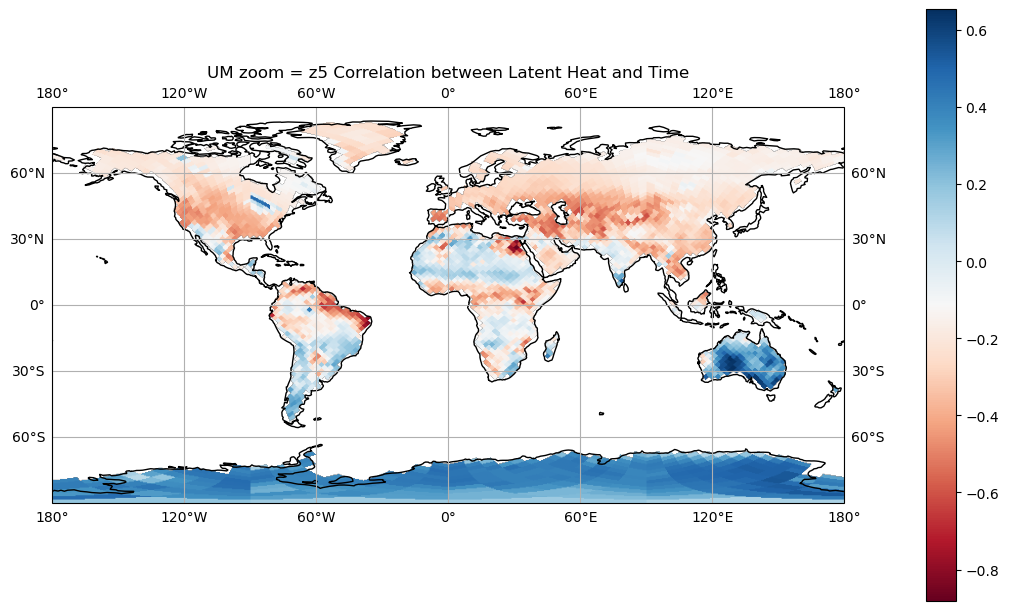

In [64]:
# daily correlation between latent heat and time

dum = xr.open_zarr(fpath)

um_pr = dum['pr'].resample(time='1D').mean(dim='time') * 86400
um_prs = dum['prs'].resample(time='1D').mean(dim='time') * 86400
um_pr = um_pr+um_prs

um_lh = (dum['hflsd']*-1).resample(time='1D').mean(dim='time')

time_step = xr.DataArray(
    np.arange(0, len(um_lh.time)),
    dims=['time'],
    coords={'time': um_lh.time})

um_corr_lh_t      =  xr.where((ds['sftlf']>0.9), xr.corr(um_lh,time_step, dim='time') , np.nan)

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(um_corr_lh_t.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Correlation between Latent Heat and Time')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

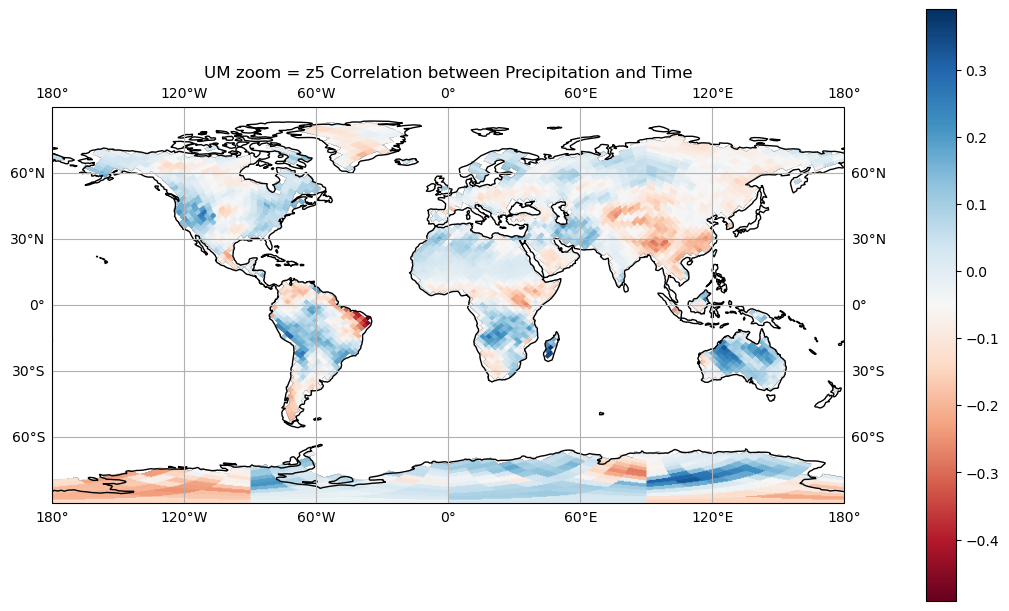

In [63]:
# correlation between precipitation and time

um_corr_pr_t      =  xr.where((ds['sftlf']>0.9), xr.corr(um_pr,time_step, dim='time') , np.nan)


plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(um_corr_pr_t.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Correlation between Precipitation and Time')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()